### Nama: Farhan Riyandi
### Email: farhanriyandi20@gmail.com
### ID Dicoding: farhan_riyandi_uyhY

Sumber: https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset

In [89]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [90]:
import pandas as pd

movie = pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/Sistem Rekomendasi/movies.csv')
rating = pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/Sistem Rekomendasi/ratings.csv')

# Movie Variabel

In [91]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [92]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [93]:
print('Banyak tipe genre: ', len(movie.genres.unique()))
print('Tipe genre: ', movie.genres.unique())

Banyak tipe genre:  951
Tipe genre:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horr

# Rating variabel

In [94]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [95]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [96]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Data Preprocessing

In [97]:
import numpy as np

# Menggabungkan Dataset
all = np.concatenate((
    movie.movieId.unique(),
    rating.movieId.unique()
))

# Mengurutkan data dan menghapus data yang sama
all = np.sort(np.unique(all))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(all))

Jumlah seluruh data movie berdasarkan movieId:  9742


# Menggabungkan Data

In [98]:
# Menggabungkan dataframe rating dengan resto_info berdasarkan nilai placeID
movies = pd.merge(rating, movie, on='movieId', how='left')
movies

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [99]:
movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [100]:
# Menghitung jumlah rating kemudian menggabungkannya berdasarkan movieId
movies.groupby('movieId').sum()

<ipython-input-100-0f8d4e3ec65d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  movies.groupby('movieId').sum()


,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


In [101]:
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# Data Preparation

In [102]:
movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

## Menyamakan Jenis Movie

In [103]:
# Mengurutkan movie berdasarkan movieID kemudian memasukkannya ke dalam variabel fix_movie
fix_movie = movies.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
81531,517,1,4.0,1487954343,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30517,213,1,3.5,1316196157,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
81082,514,1,4.0,1533872400,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30601,214,1,3.0,853937855,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
27256,184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
27257,184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
27258,184,193585,3.5,1537109805,Flint (2017),Drama
27259,184,193587,3.5,1537110021,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [104]:
# Mengecek berapa jumlah fix_movie
len(fix_movie.movieId.unique())

9724

In [105]:
# Mengecek genre movie yang unik
fix_movie.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [106]:
# Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
89904,584,1,5.0,834987643,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
58096,381,1,3.5,1164383653,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
89316,580,1,3.0,1167792349,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
61120,399,1,4.0,1167220428,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
27256,184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
27257,184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
27258,184,193585,3.5,1537109805,Flint (2017),Drama
27259,184,193587,3.5,1537110021,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [107]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
42115,288,2,2.0,978467973,Jumanji (1995),Adventure|Children|Fantasy
43169,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance
38179,262,4,1.0,840306203,Waiting to Exhale (1995),Comedy|Drama|Romance
77224,483,5,2.5,1327277284,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
27256,184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
27257,184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
27258,184,193585,3.5,1537109805,Flint (2017),Drama
27259,184,193587,3.5,1537110021,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [108]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
title = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
genres = preparation['genres'].tolist()

print(len(movie_id))
print(len(title))
print(len(genres))

9724
9724
9724


In [109]:
# Membuat dictionary untuk data ‘movie_id’, ‘title’, dan ‘genres’
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': title,
    'genres': genres
})
movie_new

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,Flint (2017),Drama
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


# Model Development dengan Content Based Filtering

In [110]:
data = movie_new
data.sample(5)

,id,title,genres
4081,5840,"My Mother's Castle (Château de ma mère, Le) (1...",Comedy|Drama
8980,139747,Before We Go (2014),Romance
6131,44020,Ultimate Avengers (2006),Action|Animation|Children|Sci-Fi
2503,3353,"Closer You Get, The (2000)",Comedy|Romance
1330,1801,"Man in the Iron Mask, The (1998)",Action|Adventure|Drama


# TF-IDF Vectorizer

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [112]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9724, 24)

In [113]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.41681721, 0.51634045, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51235785, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57836121, 0.        , 0.8157808 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [114]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(22, axis=1).sample(10, axis=0)

,noir,romance,imax,thriller,crime,listed,comedy,fi,film,mystery,...,musical,genres,no,horror,adventure,animation,documentary,action,war,children
title,,,,,,,,,,,,,,,,,,,,,
Enemy of the State (1998),0.0,0.000000,0.0,0.702724,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.711463,0.0,0.0
Ben-hur (2016),0.0,0.000000,0.0,0.000000,0.000000,0.57735,0.000000,0.000000,0.0,0.000000,...,0.0,0.57735,0.57735,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
The Hundred-Foot Journey (2014),0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.734280,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Amistad (1997),0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.904614,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Bunny (1998),0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0
I Love You to Death (1990),0.0,0.000000,0.0,0.000000,0.845832,0.00000,0.533449,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Mickey Blue Eyes (1999),0.0,0.821275,0.0,0.000000,0.000000,0.00000,0.570532,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Event Horizon (1997),0.0,0.000000,0.0,0.419602,0.000000,0.00000,0.000000,0.523903,0.0,0.000000,...,0.0,0.00000,0.00000,0.524390,0.0,0.0,0.0,0.000000,0.0,0.0
SUBWAYStories: Tales from the Underground (1997),0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


# Cosine Similarity

In [115]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.81352752, 0.15262722, ..., 0.        , 0.42122062,
        0.26751731],
       [0.81352752, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15262722, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57053212],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42122062, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26751731, 0.        , 0.57053212, ..., 0.        , 0.        ,
        1.        ]])

In [116]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9724, 9724)


title,"Graduate, The (1967)",The D Train (2015),"Killers, The (1946)","Guard, The (2011)",Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962)
title,,,,,
Sweetie (1989),0.466539,0.000000,0.0,0.000000,0.391837
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),0.172399,0.341631,0.0,0.182243,0.000000
Central Intelligence (2016),0.297748,0.590025,0.0,0.314748,0.000000
"Trigger Effect, The (1996)",0.263397,0.000000,0.0,0.000000,0.221221
Sahara (2005),0.219197,0.434366,0.0,0.231712,0.000000
View from the Top (2003),0.884500,0.570532,0.0,0.304350,0.000000
D3: The Mighty Ducks (1996),0.236324,0.468306,0.0,0.249817,0.000000
Harry Potter and the Deathly Hallows: Part 2 (2011),0.098618,0.000000,0.0,0.000000,0.082827
"Double, The (2013)",0.487802,0.521181,0.0,0.278023,0.188801


In [117]:
def movie_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'genres']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop title agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [120]:
data[data['title'] == 'Lover Come Back (1961)']

,id,title,genres
5169,8385,Lover Come Back (1961),Comedy|Romance


In [118]:
# Mendapatkan rekomendasi movie yang mirip dengan Lover Come Back (1961)
movie_recommendations('Lover Come Back (1961)')

,title,genres
0,Shall We Dance? (2004),Comedy|Romance
1,The Importance of Being Earnest (1952),Comedy|Romance
2,Good Luck Chuck (2007),Comedy|Romance
3,Mo' Money (1992),Comedy|Romance
4,Mr. Deeds (2002),Comedy|Romance
5,Kiss me Kismet (2006),Comedy|Romance
6,When Harry Met Sally... (1989),Comedy|Romance
7,Better Off Dead... (1985),Comedy|Romance
8,Impromptu (1991),Comedy|Romance
9,27 Dresses (2008),Comedy|Romance


# Model Development dengan Collaborative Filtering

In [47]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [49]:
# Membaca dataset

df = rating
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Data Preparation

In [50]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [51]:
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

encoded userID :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119,

In [52]:
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded angka ke userID:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 1

In [54]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding placeID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke placeID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [56]:
# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [57]:
df.head()

,userId,movieId,rating,timestamp,user,movie
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,1
2,1,6,4.0,964982224,0,2
3,1,47,5.0,964983815,0,3
4,1,50,5.0,964982931,0,4


In [59]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


# Membagi Data untuk Training dan Validasi

In [63]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


In [64]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


# Proses Training

In [67]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [68]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [70]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
1261/1261 [==============================] - 17s 14ms/step - loss: 0.6098 - root_mean_squared_error: 0.2044 - val_loss: 0.6139 - val_root_mean_squared_error: 0.2077
Epoch 2/10
1261/1261 [==============================] - 16s 12ms/step - loss: 0.6083 - root_mean_squared_error: 0.2027 - val_loss: 0.6148 - val_root_mean_squared_error: 0.2086
Epoch 3/10
1261/1261 [==============================] - 18s 14ms/step - loss: 0.6072 - root_mean_squared_error: 0.2013 - val_loss: 0.6120 - val_root_mean_squared_error: 0.2055
Epoch 4/10
1261/1261 [==============================] - 17s 13ms/step - loss: 0.6060 - root_mean_squared_error: 0.1997 - val_loss: 0.6113 - val_root_mean_squared_error: 0.2046
Epoch 5/10
1261/1261 [==============================] - 12s 9ms/step - loss: 0.6059 - root_mean_squared_error: 0.1995 - val_loss: 0.6114 - val_root_mean_squared_error: 0.2047
Epoch 6/10
1261/1261 [==============================] - 12s 10ms/step - loss: 0.6051 - root_mean_squared_error: 0.1983 - 

# Visualisasi Metrik

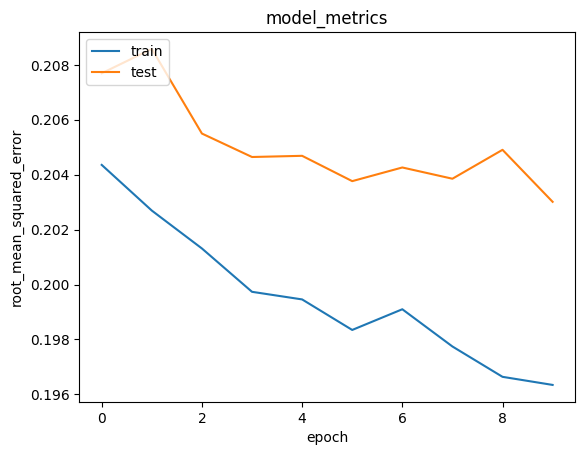

In [71]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Mendapatkan Rekomendasi Movie

In [81]:
movie_df = movie_new
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/Sistem Rekomendasi/ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [86]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 movies recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

291/291 [==============================] - 1s 4ms/step
Showing recommendations for users: 42
Movie with high ratings from user
--------------------------------
Time to Kill, A (1996) : Drama|Thriller
Doors, The (1991) : Drama
Top Gun (1986) : Action|Romance
On Golden Pond (1981) : Drama
Saving Private Ryan (1998) : Action|Drama|War
--------------------------------
Top 10 movies recommendation
--------------------------------
Rear Window (1954) : Mystery|Thriller
Cinema Paradiso (Nuovo cinema Paradiso) (1989) : Drama
Cool Hand Luke (1967) : Drama
This Is Spinal Tap (1984) : Comedy
Sweet Hereafter, The (1997) : Drama
Zero Effect (1998) : Comedy|Mystery|Thriller
Boondock Saints, The (2000) : Action|Crime|Drama|Thriller
Lord of the Rings: The Two Towers, The (2002) : Adventure|Fantasy
Departed, The (2006) : Crime|Drama|Thriller
Dark Knight, The (2008) : Action|Crime|Drama|IMAX
